<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authors:<br/>
Bishnu Rijal,<br/>
Pratim khadka,<br/>
Rajat Lamsal.

Instructor: Nicolas Jachob.<br/>

CPSMA 4413  NUMERICAL METHODS -01.<br/>



We took this block of code out straight from the project 4 where we used the Gaussian Elimination Method.

In [ ]:
import math
import numpy as np
import scipy.linalg as la

def Rows_add(matrix, T_row, M_row, value):
  newRow = matrix[T_row,:]+value*matrix[M_row,:]
  newMatrix = []
  for x in range(len(matrix)):
    if x != T_row:
      newMatrix.append(matrix[x,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)

def Leading(matrix,row,column):
  newMatrix =[]
  for x in range(len(matrix)):
    if x != row:
      newMatrix.append(matrix[x,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)

def gaussMethod(matrix):
  newMatrix = matrix
  for P in range(len(matrix)):
    newMatrix = Leading(newMatrix,P,P)
    for C in range(0,P):
      newMatrix = Rows_add(newMatrix,C,P,-newMatrix[C,P])
    for C in range(P+1,len(matrix)):
      newMatrix = Rows_add(newMatrix,C,P,-newMatrix[C,P])
  return newMatrix

We are going to use the Direct Method to find the interpolation of the given points, the polynomial function is denoted by the form:
$$
f(x) = a_0+a_1x+a_2x^2+\cdots + a_n x^n
$$

The passing points on this function can be assumed to be $(x_0,y_0)$, by substituting the points the function takes the following form:

$$
a_0+a_1x_0+a_2 x_0^2+\cdots +a_n x_0^n = y_0
$$


Now we will be considering the function by using the Gaussian Elimination method, lets arrange them in matrix in order to apply the gaussian elimination.

$$
\left[
\begin{array}{ccccc|c}
1&x_0&x_0^2&\cdots&x_0^n&y_0\\
\vdots&&\ddots&&\vdots\\
1&x_{n-1}&x_{n-1}^2&\dots& x_{n-1}^n&y_{n-1}
\end{array}
\right]
$$

In [ ]:

def Row_create(input, output, order):
  list = []
  for x in range(order+1):
    list.append(input**x)
  list.append(output)
  return list

In [ ]:

Row_create(1,3,4)

[1, 1, 1, 1, 1, 3]

In [ ]:
points = [[2,5], [1,6], [3,7], [8,1], [12,-1]]

In [ ]:
def Create_matrix(pointsAsArray):
  matrix = []
  order = len(pointsAsArray) - 1
  for x in range(len(pointsAsArray)):
    matrix.append(Row_create(pointsAsArray[x][0],pointsAsArray[x][1], order))
  return np.array(matrix)

In [ ]:
Create_matrix(points)

array([[    1,     2,     4,     8,    16,     5],
       [    1,     1,     1,     1,     1,     6],
       [    1,     3,     9,    27,    81,     7],
       [    1,     8,    64,   512,  4096,     1],
       [    1,    12,   144,  1728, 20736,    -1]])

In [ ]:
gaussMethod(Create_matrix(points))[:,-1]

string = ''
for x in range(len(gaussMethod(Create_matrix(points))[:,-1])):
  coefficient = gaussMethod(Create_matrix(points))[x,-1]
  string = string + '+{}'.format(coefficient) +r'x^{}'.format(x)

string

'+13.27705627705628x^0+-11.699711399711404x^1+5.1286435786435804x^2+-0.7379509379509384x^3+0.031962481962481984x^4'

In [ ]:
def Spline_direct(pointsAsArray, variable):
  coefficients = gaussMethod(Create_matrix(pointsAsArray))[:,-1]
  value =0;
  for x in range(len(coefficients)):
    value = value + coefficients[x]*variable**x
  return value

In [ ]:
Spline_direct(points,3)

7.000000000000003

<function matplotlib.pyplot.show>

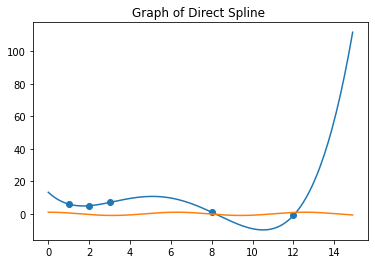

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0,15,.1)
plt.scatter(np.array(points)[:,0],np.array(points)[:,1])
plt.plot(x, Spline_direct(points, x))
plt.plot(x,np.cos(x))
plt.title('Graph of Direct Spline ')

plt.show

Linear Splines is the method where the given data points are calculated by connecting the two consecutive data points with one another using a straight line.


In [ ]:
def divideIntervalEvenly(function,lower,upper,numberOfDivisions):
  deltax = (upper - lower)/(numberOfDivisions - 1)
  array = []
  for i in range(numberOfDivisions):
    array.append([lower + i*deltax,function(lower + i*deltax)])
  return np.array(array)

fiveCordinates = divideIntervalEvenly(np.sin,0,2*np.pi,5)

In [ ]:
def slope(pointInitial,pointFinal):
  return (pointFinal[1]-pointInitial[1])/(pointFinal[0]-pointInitial[0])

In [ ]:
def linerSpline(array,input):
  x = array[:,0]
  y = array[:,1]
  for i in range(len(x)-1):
    if (x[i]< input) & (input < x[i+1]):
      return y[i]+ slope(array[i,:],array[i+1,:])*(input - x[i])
    else:
      continue

In [ ]:
linerSpline(fiveCordinates,1)

0.6366197723675814

In [ ]:
x = np.arange(0,6.35,0.1)
y = [linerSpline(fiveCordinates,x) for x in x]

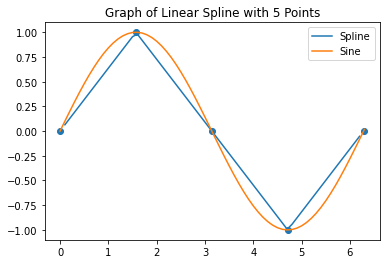

In [ ]:
x = np.arange(0,6.35,0.1)

plt.scatter(fiveCordinates[:,0],fiveCordinates[:,1])
plt.plot(x,y)
plt.plot(x, np.sin(x))
plt.title('Graph of Linear Spline with 5 Points')
plt.legend(['Spline','Sine'])


plt.show()

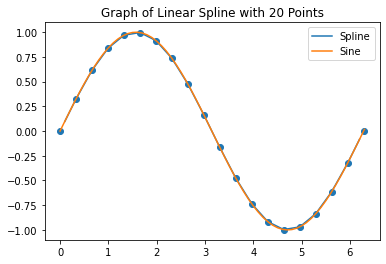

In [ ]:
twentycordinates = divideIntervalEvenly(np.sin,0,2*np.pi,20)
x = np.arange(0,6.35,0.1)
y = [linerSpline(twentycordinates,x) for x in x]
plt.scatter(twentycordinates[:,0],twentycordinates[:,1])
plt.plot(x,y)
plt.plot(x, np.sin(x))
plt.title('Graph of Linear Spline with 20 Points')
plt.legend(['Spline','Sine'])


plt.show()

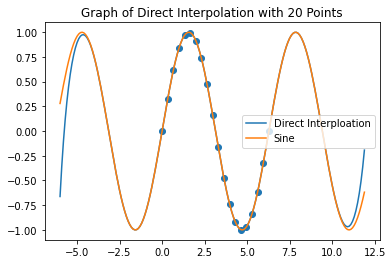

In [ ]:

x = np.arange(-6,12,0.1)

plt.scatter(twentycordinates[:,0],twentycordinates[:,1])
plt.plot(x,directSpline(twentycordinates,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Direct Interpolation with 20 Points')
plt.legend(['Direct Interploation','Sine'])